In [1]:
import requests
from bs4 import BeautifulSoup
import re
import numpy as np

In [2]:
url = "https://www.makaan.com/hyderabad-residential-property/rent-property-in-hyderabad-city?propertyType=apartment,villa,independent-house&page=3&_=1691596386566"

In [3]:
page = requests.get(url)
page

<Response [200]>

In [4]:
Data = BeautifulSoup(page.text)

In [5]:
Data

<!DOCTYPE html>
<html lang="en"><head><meta content="text/html; charset=utf-8" http-equiv="Content-type"/><title>Property for Rent in Hyderabad | 4598+ Properties on rent in Hyderabad</title><meta content="Find 100% Verified 4598+ Properties for Rent/Lease in Hyderabad on Makaan.com. Search ✓3203+ Flats for Rent/Lease. ✓793+ Houses/Villas for Rent. Visit Now!" name="description"/><meta content="Rental Properties in Hyderabad, Residential Hyderabad Property for rent, Hyderabad Property for rent, Property for rent in Hyderabad" name="keywords"/><meta content="#fff" id="themeColor" name="theme-color"/><meta content="origin" name="referrer"/><meta content="55ce01b3ca93c05fd5a41439a23dd0d9" name="p:domain_verify"/><meta content="155462194517712" name="fb:pages"/><meta content="India" name="country"/><meta content="website" name="og:type"/><meta content="Makaan.com" name="og:site_name"/><meta content="http://static.makaan.com/6/12/355/11020788.jpeg" name="og:image:url"/><meta content="minimu

In [6]:
BHK=[]
Area = []
Price =[]
sqfeet =[]
status = []
Deposit =[]
Bathrooms =[]
Facing = []
property_Type =[]
for i in range(1,26):
    url = f"https://www.makaan.com/hyderabad-residential-property/rent-property-in-hyderabad-city?propertyType=apartment,villa,independent-house&page={i}&_=1691596386566"
    page = requests.get(url)
    Data = BeautifulSoup(page.text)

    for i in Data.find_all("div",class_="title-line-wrap"):
        #print(i.text)
        regex =  re.findall("(^\d) BHK",i.text)
        #print(regex)
        if regex:
                BHK.append(regex[0])
        else:
             BHK.append(np.nan)

    for i in Data.find_all("div",class_="title-line-wrap"):
        #print(i.text)
        regex =  re.findall("^\d BHK ((?:Villa|Apartment|Independent House))",i.text)
        #print(regex)
        if regex:
            property_Type.append(regex[0])
        else:
            property_Type.append(np.nan)

    for i in Data.find_all("span",class_="locName"):
        #print(i.text)
        regex =  re.findall("(^\w.+), Hyderabad",i.text)
        #print(regex)
        if regex:
                Area.append(regex[0])
        else:
             Area.append(np.nan)
    for i in Data.find_all("td",class_="price"):
        #print(i.text)

        Price.append(i.text)

    for i in Data.find_all("td",class_="size"):
        #print(i.text)

        sqfeet.append(i.text)


    for i in Data.find_all("td",class_="val"):
        #print(i.text)

        status.append(i.text)



    for i in Data.find_all("ul",class_="listing-details"):
        #print(i.text)

        regex = re.findall("(\d) bathrooms",i.text)

        #print(regex)

        if regex:

            Bathrooms.append(regex[0])

        else:

            Bathrooms.append(np.nan)

    for i in Data.find_all("ul",class_="listing-details"):

        regex = re.findall("bathrooms(\w+\s)facing",i.text)

        #print(regex)

        if regex:

            Facing.append(regex[0])

        else:

            Facing.append(np.nan)







In [7]:
Rent_House={'LOCATION':Area,
            'PROPERTY TYPE':property_Type,
            'BHK':BHK,
            'DIRECTION':Facing,
            'AREA':sqfeet,
            'BATHROOMS':Bathrooms,
            'STATUS':status,
            'PRICE':Price}

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from matplotlib.colors import LinearSegmentedColormap

In [66]:
df = pd.DataFrame(Rent_House)
df

,LOCATION,PROPERTY TYPE,BHK,DIRECTION,AREA,BATHROOMS,STATUS,PRICE
0,Old Bowenpally,Independent House,4,East,1000,2,Unfurnished,"16,500"
1,Khairatabad Road,Independent House,2,NorthEast,700,1,Semi-Furnished,"14,000"
2,Kokapet,Villa,4,East,4200,4,Semi-Furnished,1.25 L
3,Lakdikapul,Apartment,1,NaN,600,1,Unfurnished,"8,000"
4,Shaikpet,Independent House,2,NorthEast,1200,1,Unfurnished,"12,000"
...,...,...,...,...,...,...,...,...
495,Kukatpally,Apartment,4,East,3300,4,Furnished,1.1 L
496,Gachibowli,Apartment,2,East,1050,2,Semi-Furnished,"24,000"
497,Gachibowli,Apartment,3,West,1700,3,Semi-Furnished,"48,000"
498,Hitech City,Apartment,3,East,1945,3,Semi-Furnished,"68,000"


In [70]:
df = df.dropna()

In [71]:

df['AREA'] = df['AREA'].astype(int)
df['BATHROOMS'] = df['BATHROOMS'].astype(int)
df['BHK'] = df['BHK'].astype(int)
df['PRICE'] = df['PRICE'].astype(str)
df['PRICE'] = df['PRICE'].apply(lambda x: x.replace(',', ''))  # Remove commas for consistency
df['PRICE'] = df['PRICE'].apply(lambda x: int(float(x.replace('L', '')) * 100000) if 'L' in x else int(float(x)))

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397 entries, 0 to 499
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   LOCATION       397 non-null    object
 1   PROPERTY TYPE  397 non-null    object
 2   BHK            397 non-null    int32 
 3   DIRECTION      397 non-null    object
 4   AREA           397 non-null    int32 
 5   BATHROOMS      397 non-null    int32 
 6   STATUS         397 non-null    object
 7   PRICE          397 non-null    int64 
dtypes: int32(3), int64(1), object(4)
memory usage: 23.3+ KB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PRICE,500.0,51258.724,44024.051394,6500.0,30000.0,46750.0,56000.0,600000.0


In [13]:
df.describe(include = object).T

,count,unique,top,freq
LOCATION,500,84,Gachibowli,62
PROPERTY TYPE,495,3,Apartment,443
BHK,495,7,3,310
DIRECTION,399,7,NorthEast,290
AREA,500,127,1700,26
BATHROOMS,500,7,3,281
STATUS,500,3,Semi-Furnished,325


In [14]:
df["AREA"].value_counts()

AREA
1700     26
1800     21
1500     20
2100     19
1200     17
         ..
7500      1
1834      1
4300      1
2850      1
1730      1
Name: count, Length: 127, dtype: int64

In [15]:
df["PROPERTY TYPE"].value_counts()

PROPERTY TYPE
Apartment            443
Villa                 28
Independent House     24
Name: count, dtype: int64

In [16]:
df["DIRECTION"].value_counts()

DIRECTION
NorthEast     290
East           73
West           17
NorthWest       8
North           8
SouthEast       2
South           1
Name: count, dtype: int64

In [17]:
df["STATUS"].value_counts()

STATUS
Semi-Furnished    325
Furnished         120
Unfurnished        55
Name: count, dtype: int64

In [18]:
df.groupby(('LOCATION'))[['PROPERTY TYPE','STATUS','DIRECTION','BHK']].value_counts()

LOCATION        PROPERTY TYPE  STATUS          DIRECTION   BHK
6th Phase KPHB  Apartment      Semi-Furnished  East        3      1
Abids           Apartment      Furnished       East        3      1
Amberpet        Apartment      Semi-Furnished  East        3      1
                                                           2      1
Ameerpet        Apartment      Semi-Furnished  East        1      1
                                                                 ..
Tellapur        Villa          Semi-Furnished  NorthEast   4      1
                Apartment      Semi-Furnished  West        3      1
                                               East        4      1
                                                           3      1
raidurgam       Apartment      Semi-Furnished  NorthEast   3      1
Name: count, Length: 150, dtype: int64

In [19]:
df.groupby(['PROPERTY TYPE','STATUS'])['AREA'].value_counts()

PROPERTY TYPE  STATUS          AREA 
Apartment      Furnished       1700      9
                               3105      9
                               2020      7
                               1500      5
                               1800      4
                                        ..
Villa          Semi-Furnished  2940      1
                               2800      1
                               2000      1
               Unfurnished     2400     14
                               2500      1
Name: count, Length: 188, dtype: int64

In [20]:
df.groupby(['DIRECTION'])['AREA'].value_counts()

DIRECTION  AREA 
East       2400     9
           1500     5
           2000     4
           1200     4
           1600     4
                   ..
West       1700     1
           1350     1
           1200     1
           1150     1
           4500     1
Name: count, Length: 152, dtype: int64

In [21]:
ct = pd.crosstab(df['DIRECTION'], df['LOCATION'])
ct

LOCATION,6th Phase KPHB,Abids,Amberpet,Ameerpet,Appa Junction,Bachupally,Banjara Hills,Chandanagar,Gachibowli,Gopanpally,...,Sainikpuri,Sanjeeva Reddy Nagar,Serilingampally,Shaikpet,Shamshabad,Somajiguda,Sri Nagar Colony,Tarnaka,Tellapur,raidurgam
DIRECTION,,,,,,,,,,,,,,,,,,,,,
East,1,1,2,1,0,1,2,1,8,0,...,0,1,1,0,0,0,1,1,4,0
North,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NorthEast,0,0,0,0,1,3,3,1,50,2,...,0,0,1,4,0,0,1,0,14,1
NorthWest,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
South,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
SouthEast,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
West,0,0,0,0,0,0,0,0,1,0,...,1,0,0,1,1,0,0,0,1,0


In [22]:
ct = pd.crosstab(df['PROPERTY TYPE'], df['DIRECTION'])
ct

DIRECTION,East,North,NorthEast,NorthWest,South,SouthEast,West
PROPERTY TYPE,,,,,,,
Apartment,55,8,276,6,1,2,13
Independent House,3,0,10,0,0,0,2
Villa,13,0,4,2,0,0,2


In [23]:
ct = pd.crosstab(df['STATUS'], df['PROPERTY TYPE'])
ct

PROPERTY TYPE,Apartment,Independent House,Villa
STATUS,,,
Furnished,111,5,2
Semi-Furnished,299,14,11
Unfurnished,33,5,15


In [24]:
ct = pd.crosstab(df['PROPERTY TYPE'], df['LOCATION'])
ct

LOCATION,6th Phase KPHB,Abids,Almasguda,Amberpet,Ameerpet,Appa Junction,Attapur,Ayyappa Society,Bachupally,Bandlaguda Jagir,...,Somajiguda,Sri Nagar Colony,Suraram,Tarnaka,Tellapur,Toli Chowki,Uppal,Upparpally,muthangi,raidurgam
PROPERTY TYPE,,,,,,,,,,,,,,,,,,,,,
Apartment,1,2,0,6,1,1,1,1,3,0,...,2,1,1,2,18,1,2,1,1,1
Independent House,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
Villa,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,2,0,0,0,0,0


In [25]:

pivot_table = pd.pivot_table(df, index=[ 'STATUS', 'DIRECTION','LOCATION'], columns='PROPERTY TYPE', values=[ 'PRICE', 'AREA','BHK', 'BATHROOMS'], aggfunc='value_counts', fill_value=0)

pivot_table

PROPERTY TYPE                                                        Apartment  \
STATUS      DIRECTION  LOCATION          BHK AREA  BATHROOMS PRICE               
Furnished   East       Abids             3   1624  3         140000          1   
                       Banjara Hills     3   3100  4         100000          1   
                       Chandanagar       3   1500  3         25000           1   
                       Gachibowli        3   2500  3         70000           1   
                                         4   3450  4         150000          1   
...                                                                        ...   
Unfurnished NorthEast  Jubilee Hills     2   1200  2         37000           1   
                                             1100  2         39000           1   
                       Ramachandra Puram 2   950   2         8500            0   
                       Miyapur           2   1000  2         26000           1   
                       Punjagutta        3   3000  3         44000           1   

PROPERTY TYPE                                                        Independent House  \
STATUS      DIRECTION  LOCATION          BHK AREA  BATHROOMS PRICE                       
Furnished   East       Abids             3   1624  3         140000                  0   
                       Banjara Hills     3   3100  4         100000                  0   
                       Chandanagar       3   1500  3         25000                   0   
                       Gachibowli        3   2500  3         70000                   0   
                                         4   3450  4         150000                  0   
...                                                                                ...   
Unfurnished NorthEast  Jubilee Hills     2   1200  2         37000                   0   
                                             1100  2         39000                   0   
                       Ramachandra Puram 2   950   2         8500                    1   
                       Miyapur           2   1000  2         26000                   0   
                       Punjagutta        3   3000  3         44000                   0   

PROPERTY TYPE                                                        Villa  
STATUS      DIRECTION  LOCATION          BHK AREA  BATHROOMS PRICE          
Furnished   East       Abids             3   1624  3         140000      0  
                       Banjara Hills     3   3100  4         100000      0  
                       Chandanagar       3   1500  3         25000       0  
                       Gachibowli        3   2500  3         70000       0  
                                         4   3450  4         150000      0  
...                                                                    ...  
Unfurnished NorthEast  Jubilee Hills     2   1200  2         37000       0  
                                             1100  2         39000       0  
                       Ramachandra Puram 2   950   2         8500        0  
                       Miyapur           2   1000  2         26000       0  
                       Punjagutta        3   3000  3         44000       0  

[283 rows x 3 columns]

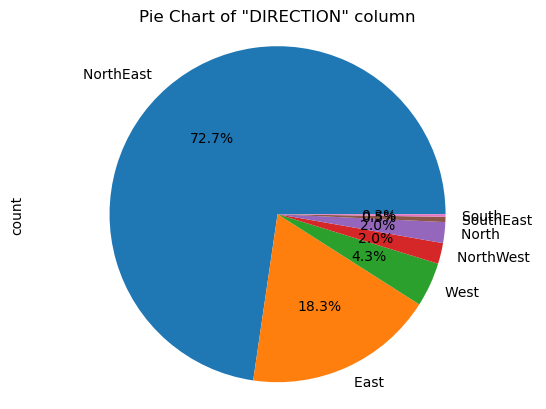

In [26]:

df['DIRECTION'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')
plt.title('Pie Chart of "DIRECTION" column')
plt.show()

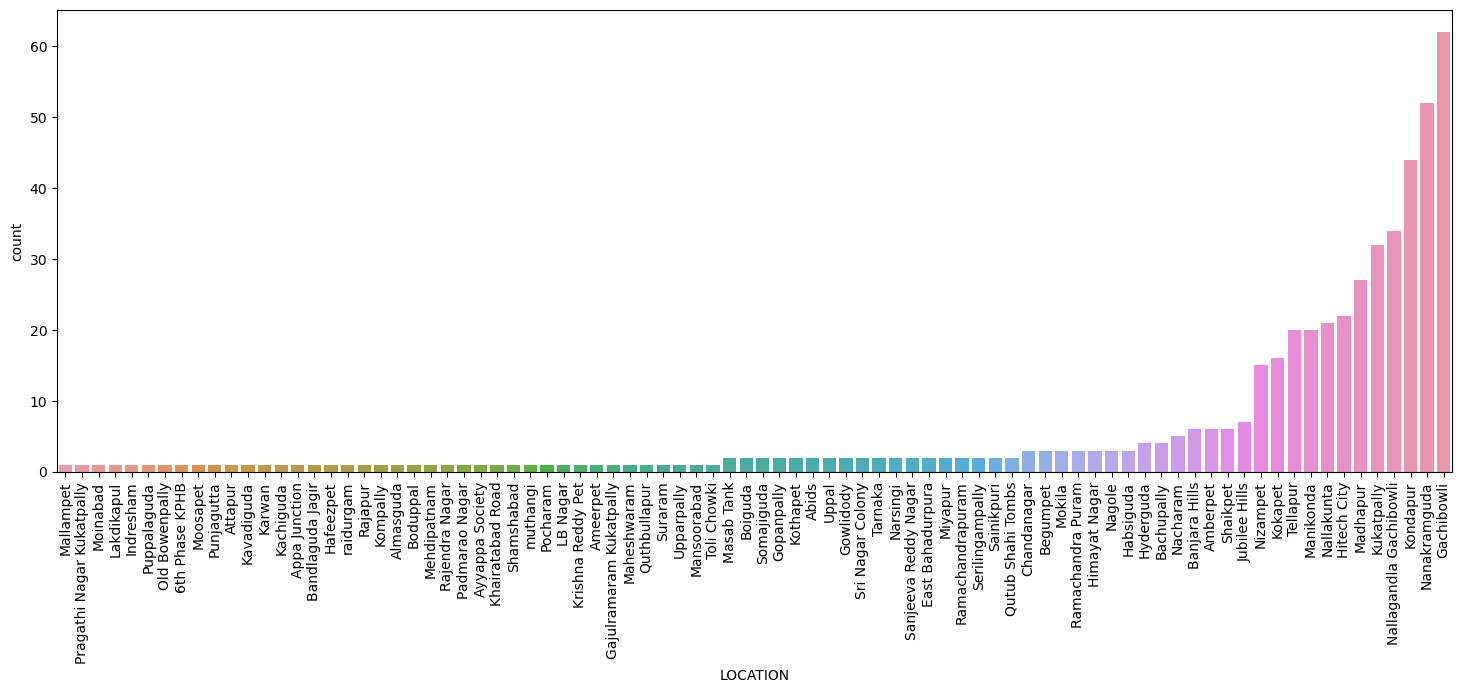

In [27]:
order = df['LOCATION'].value_counts().sort_values().index

plt.figure(figsize=(18,6))
sns.countplot(data=df, x='LOCATION', order=order)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='PRICE', ylabel='Density'>

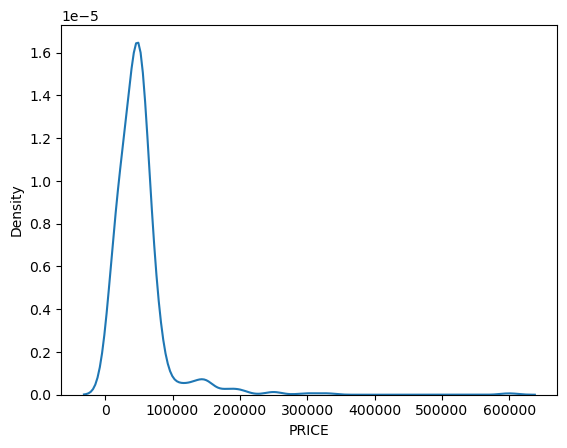

In [28]:
sns.kdeplot(data = df, x = 'PRICE')

Text(0.5, 1.0, 'Distribution of Property Types')

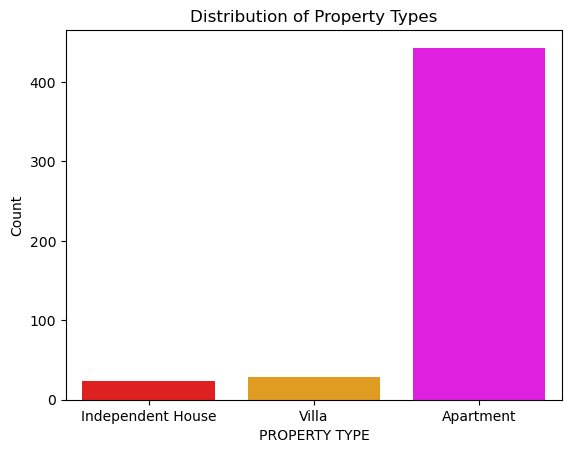

In [30]:
sns.countplot(data=df, x="PROPERTY TYPE", palette=["red", "orange", "magenta"])
plt.xlabel("PROPERTY TYPE")
plt.ylabel("Count")
plt.title("Distribution of Property Types")

<Axes: xlabel='DIRECTION', ylabel='count'>

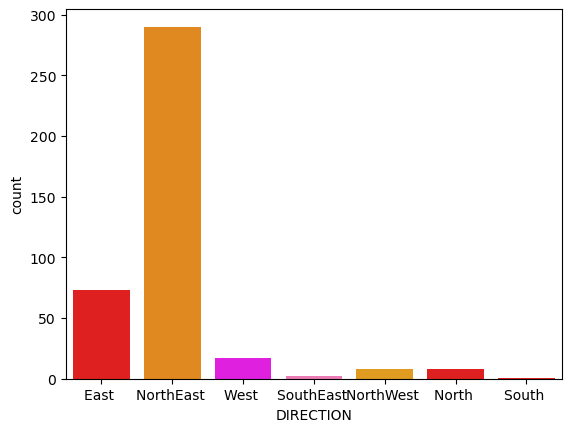

In [31]:
sns.countplot(data=df, x='DIRECTION', palette=["red", "darkorange", "magenta", 'hotpink', 'orange', 'red'])

<Axes: xlabel='STATUS', ylabel='count'>

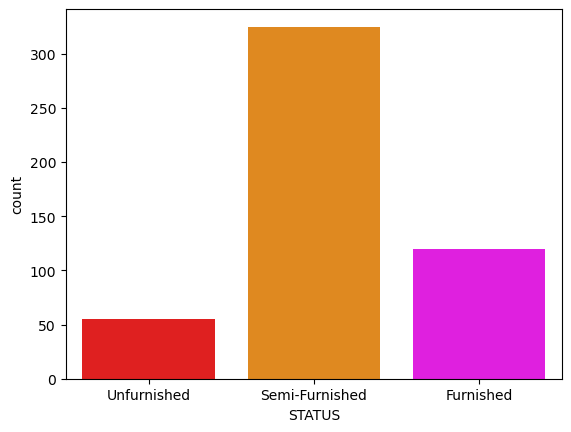

In [32]:
sns.countplot(data = df, x = 'STATUS',palette=["red", "darkorange", "magenta", 'hotpink', 'orange', 'red'])

<Axes: xlabel='BHK', ylabel='count'>

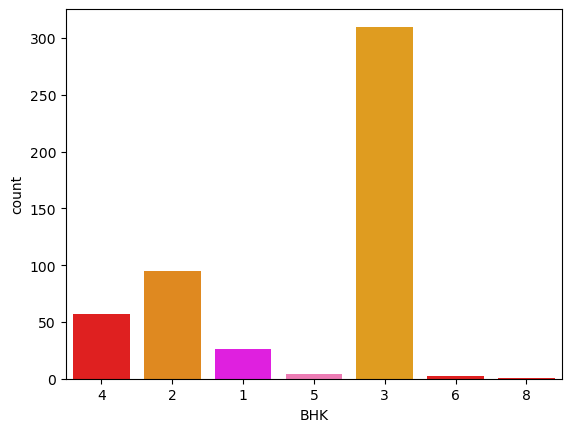

In [33]:
sns.countplot(data = df, x = "BHK",  palette=["red", "darkorange", "magenta", 'hotpink', 'orange', 'red'])

<Axes: xlabel='PRICE', ylabel='Density'>

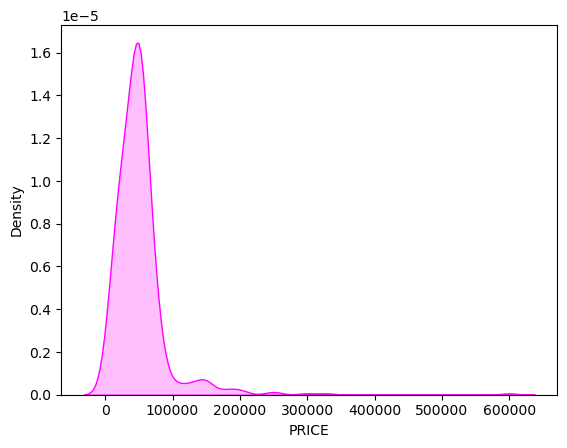

In [34]:
sns.kdeplot(data=df, x='PRICE', fill=True, color='magenta')

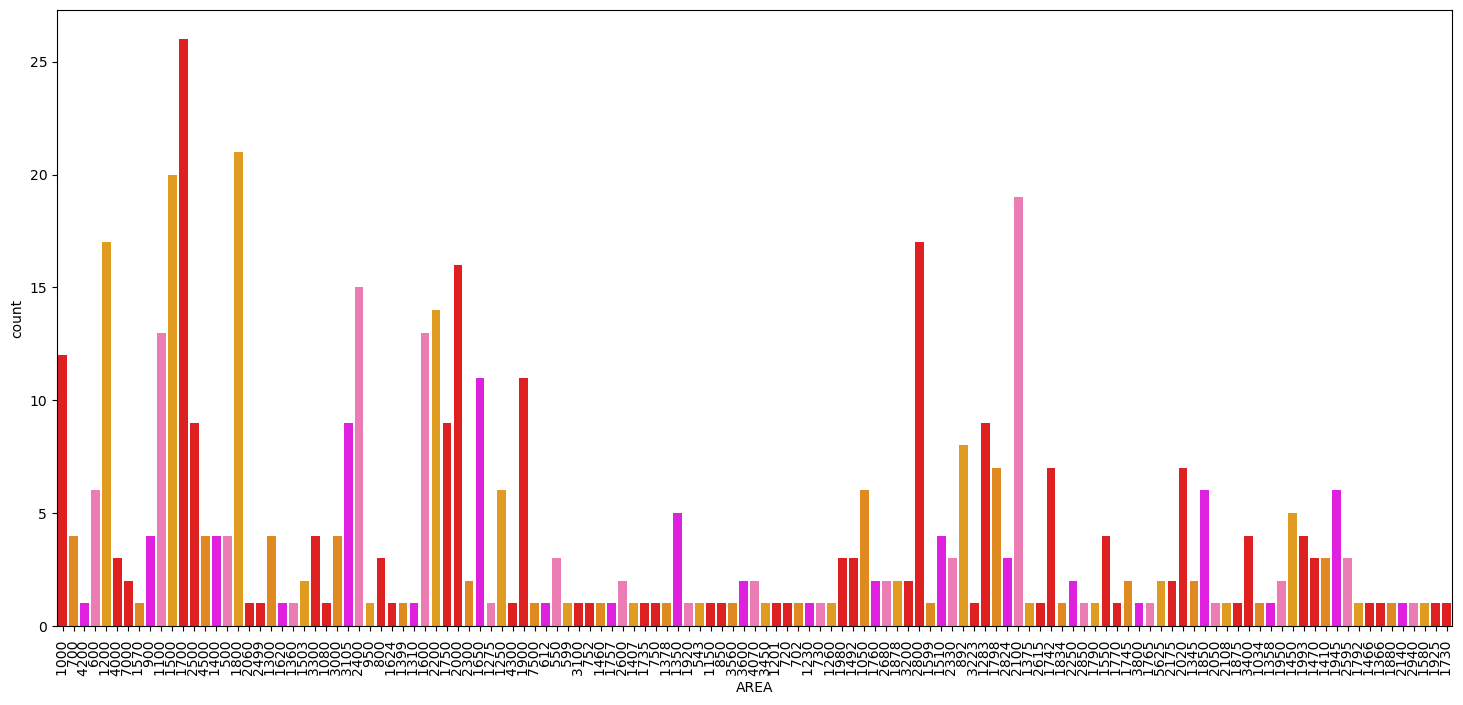

In [35]:
plt.figure(figsize =(18,8))
ax = sns.countplot(x= 'AREA',data = df,palette=["red", "darkorange", "magenta", 'hotpink', 'orange', 'red'])
plt.xticks(rotation=90)
plt.show()

<Axes: >

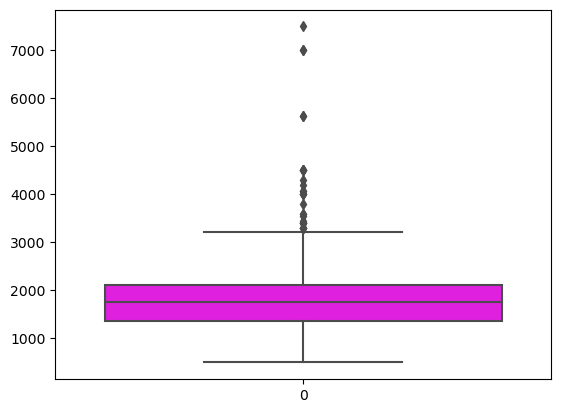

In [36]:
sns.boxplot(df["AREA"],palette=[ "magenta"])

<Axes: xlabel='BATHROOMS', ylabel='count'>

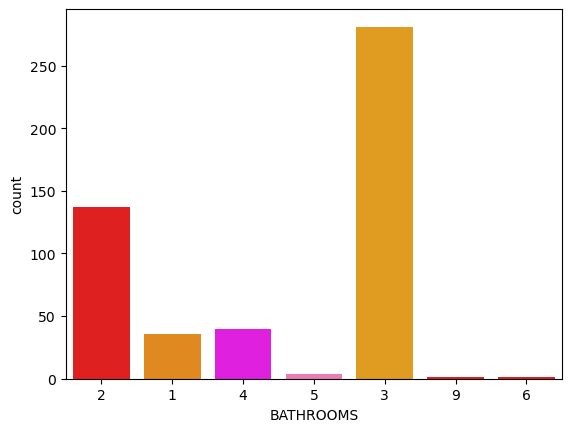

In [37]:
sns.countplot(data = df, x = 'BATHROOMS',palette=["red", "darkorange", "magenta", 'hotpink', 'orange', 'red'])

<Axes: xlabel='PROPERTY TYPE', ylabel='count'>

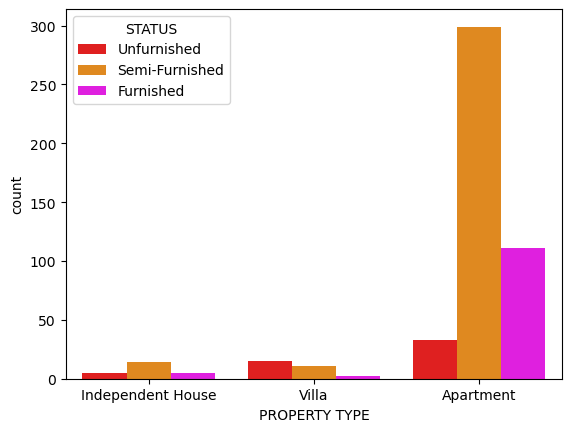

In [38]:
sns.countplot(data = df,hue = "STATUS",x = "PROPERTY TYPE",palette=["red", "darkorange", "magenta"])

<Axes: xlabel='BHK', ylabel='PRICE'>

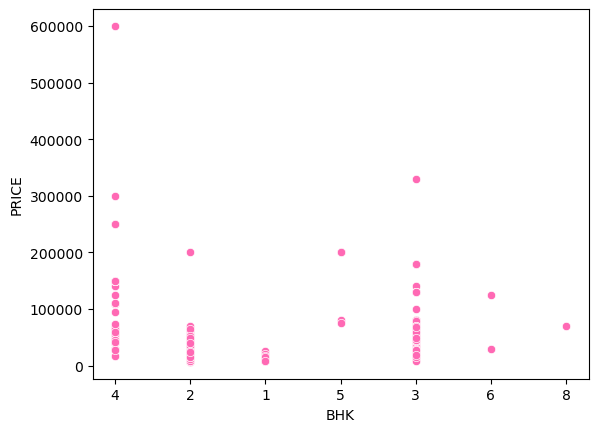

In [39]:
sns.scatterplot(data=df, x='BHK', y='PRICE', color = 'hotpink')

<Axes: xlabel='AREA', ylabel='PRICE'>

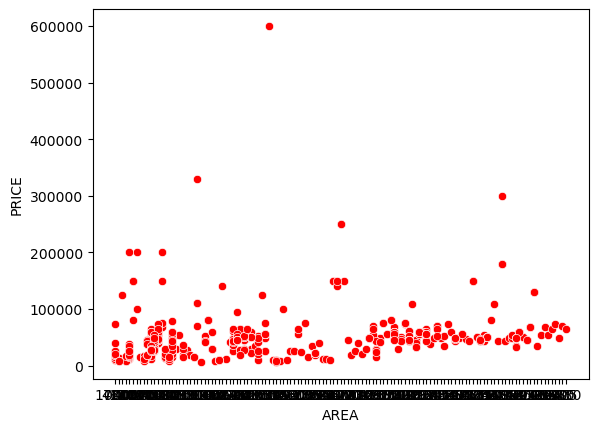

In [40]:
sns.scatterplot(data = df, x = 'AREA', y = 'PRICE',color = 'red')

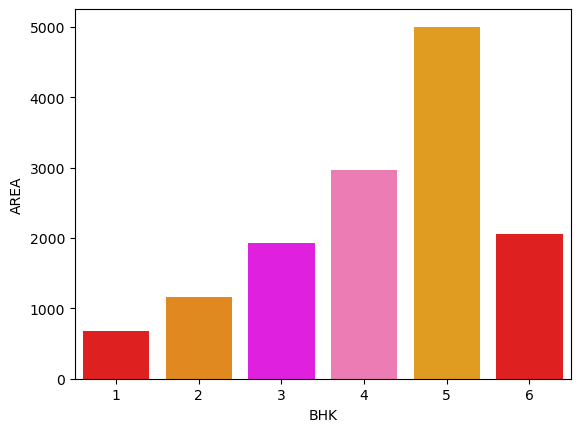

In [73]:
ax = sns.barplot(x = 'BHK',y = 'AREA',data = df,ci=None,palette=["red", "darkorange", "magenta", 'hotpink', 'orange', 'red'])


<Axes: xlabel='BATHROOMS', ylabel='AREA'>

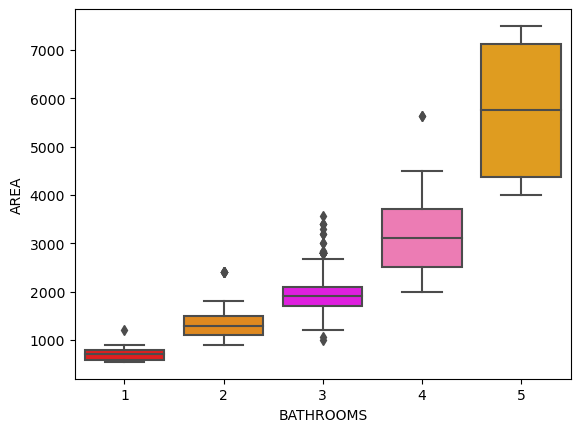

In [74]:
sns.boxplot(data=df, x="BATHROOMS", y="AREA",palette=["red", "darkorange", "magenta", 'hotpink', 'orange', 'red'])

<Axes: xlabel='STATUS', ylabel='PRICE'>

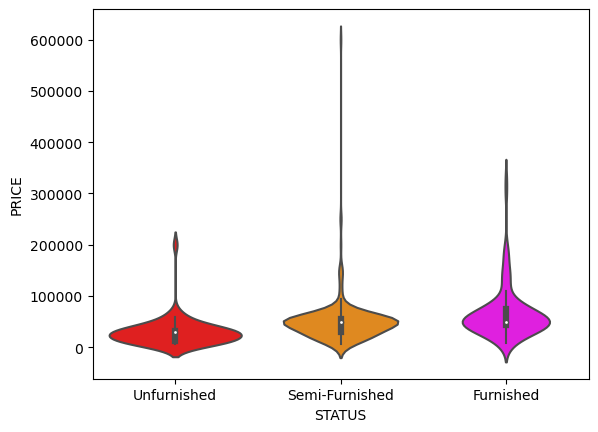

In [43]:
sns.violinplot(data = df,x = 'STATUS',y = 'PRICE',palette=["red", "darkorange", "magenta", 'hotpink', 'orange', 'red'])

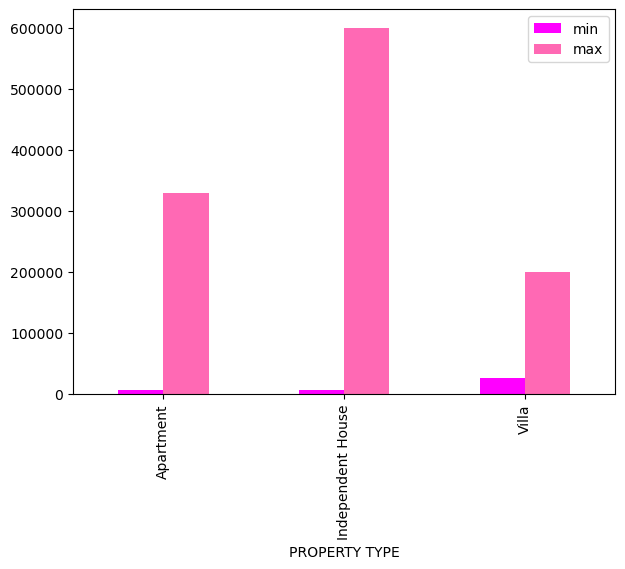

In [44]:
bar_color = ([ "magenta", 'hotpink', 'orange', 'red'])
ax = df.groupby("PROPERTY TYPE")['PRICE'].agg(['min','max']).plot(kind = 'bar',color = bar_color,figsize =(7,5))


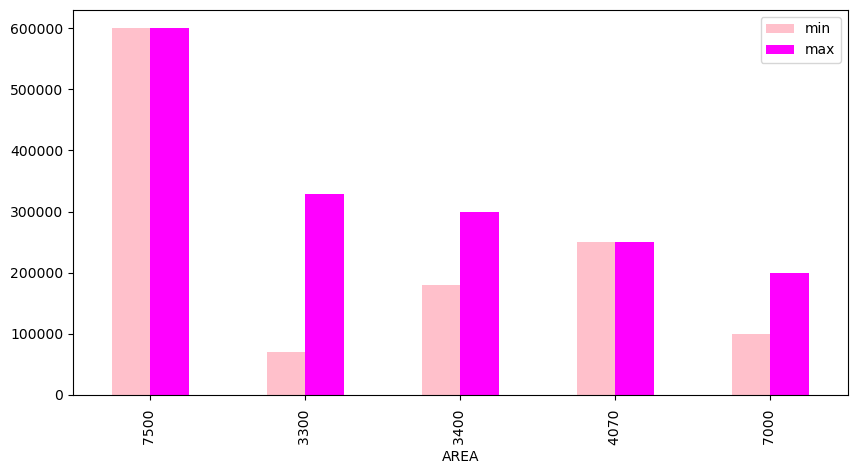

In [45]:
bar_color = (['pink','magenta'])
ax = df.groupby('AREA')['PRICE'].agg(["min","max"]).sort_values(by = "max",ascending =False)[:5].plot(kind= "bar",color =bar_color,figsize = (10,5))


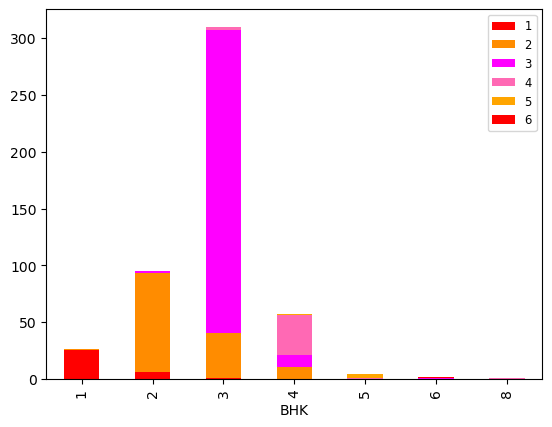

In [46]:
pd.crosstab(index=df["BHK"], columns=df["BATHROOMS"]).plot(kind="bar", stacked=True, color=["red", "darkorange", "magenta", 'hotpink', 'orange', 'red'])
plt.legend(bbox_to_anchor=(1, 1), fontsize='small')

<Axes: xlabel='PROPERTY TYPE', ylabel='AREA'>

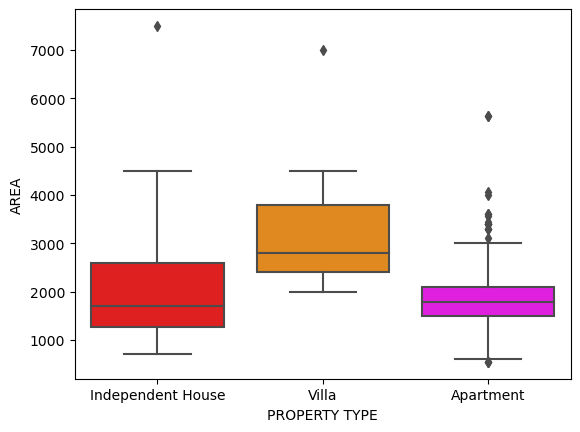

In [75]:
sns.boxplot(data=df, x="PROPERTY TYPE", y="AREA",palette=["red", "darkorange", "magenta", 'hotpink', 'orange', 'red'])

<Axes: xlabel='PRICE', ylabel='AREA'>

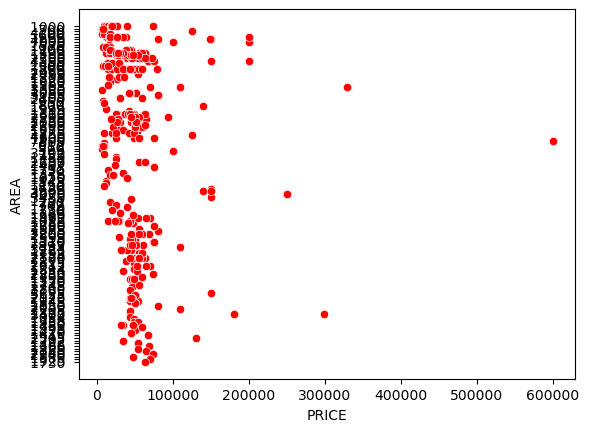

In [48]:
sns.scatterplot(x=df["PRICE"], y=df["AREA"], color="red")


<Axes: xlabel='PRICE', ylabel='AREA'>

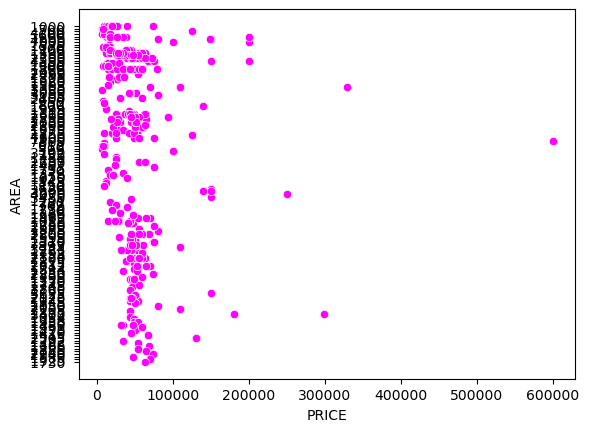

In [49]:
sns.scatterplot(x =df[ "PRICE"],y = df["AREA"],color="magenta")

<Axes: xlabel='BHK', ylabel='BATHROOMS'>

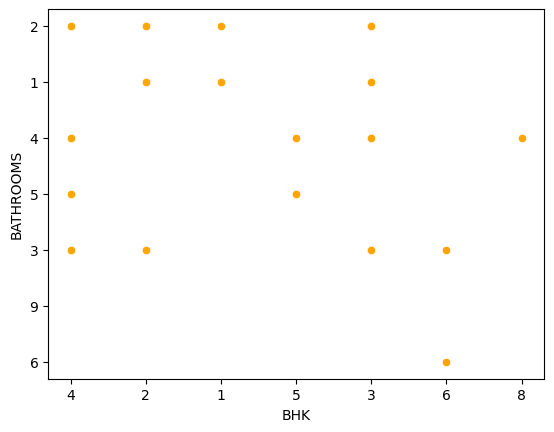

In [50]:
sns.scatterplot(x=df["BHK"],y = df["BATHROOMS"],color="orange")

<Axes: xlabel='BHK', ylabel='PRICE'>

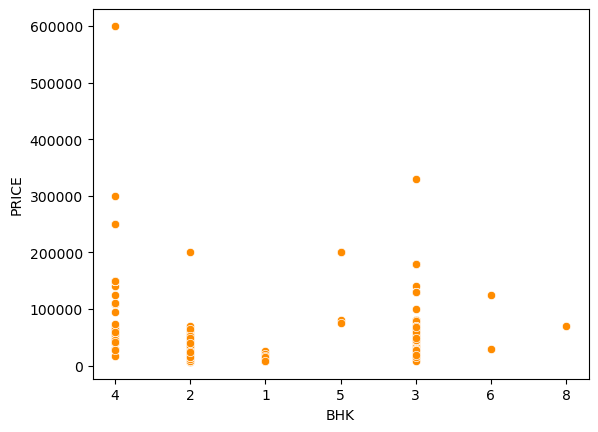

In [51]:
sns.scatterplot(x=df["BHK"],y =df["PRICE"],color ="darkorange")

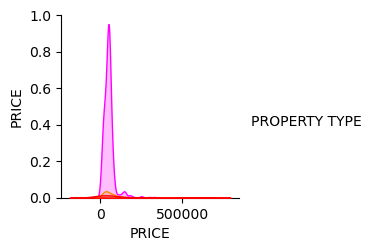

In [52]:
sns.pairplot(df, hue='PROPERTY TYPE',  markers=["o", "s", "D"],palette=["red", "darkorange", "magenta", 'hotpink', 'orange', 'red'])

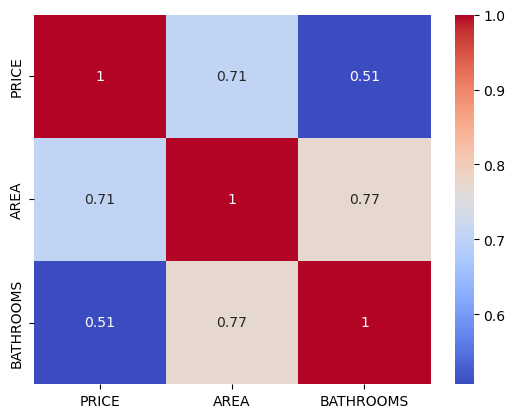

In [53]:
sns.heatmap(df[['PRICE', 'AREA', 'BATHROOMS']].corr(), annot=True, cmap='coolwarm')
plt.show()

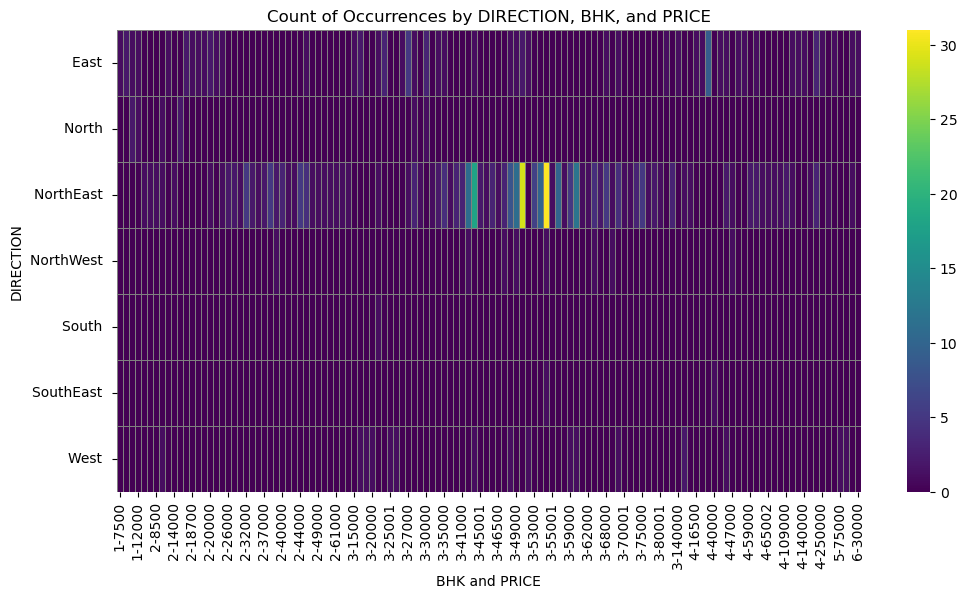

In [55]:
pivot_table = df.pivot_table(index='DIRECTION', columns=['BHK','PRICE'], aggfunc='size', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='viridis', linewidths=0.5, linecolor='gray')
plt.title('Count of Occurrences by DIRECTION, BHK, and PRICE')
plt.xlabel('BHK and PRICE')
plt.ylabel('DIRECTION')
plt.show()

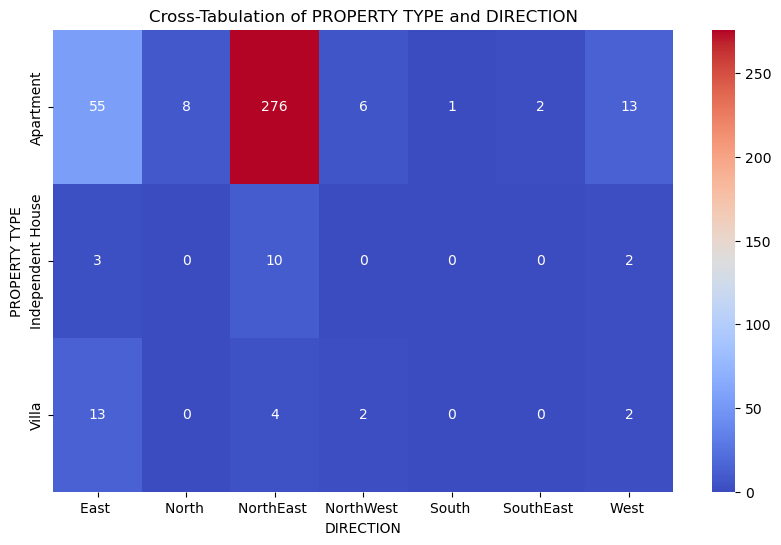

In [56]:
ct = pd.crosstab(df['PROPERTY TYPE'], df['DIRECTION'])
plt.figure(figsize=(10, 6))
sns.heatmap(ct, cmap='coolwarm', annot=True, fmt='d')
plt.title('Cross-Tabulation of PROPERTY TYPE and DIRECTION')
plt.xlabel('DIRECTION')
plt.ylabel('PROPERTY TYPE')
plt.show()

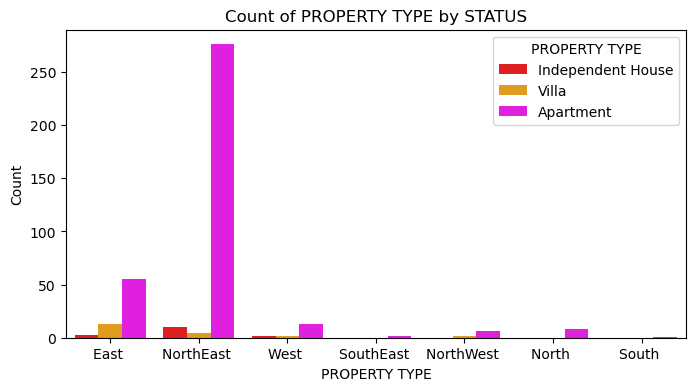

In [57]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, hue='PROPERTY TYPE', x ='DIRECTION', palette=["red", "orange", "magenta"])
plt.xlabel('PROPERTY TYPE')
plt.ylabel('Count')
plt.title('Count of PROPERTY TYPE by STATUS')
plt.show()

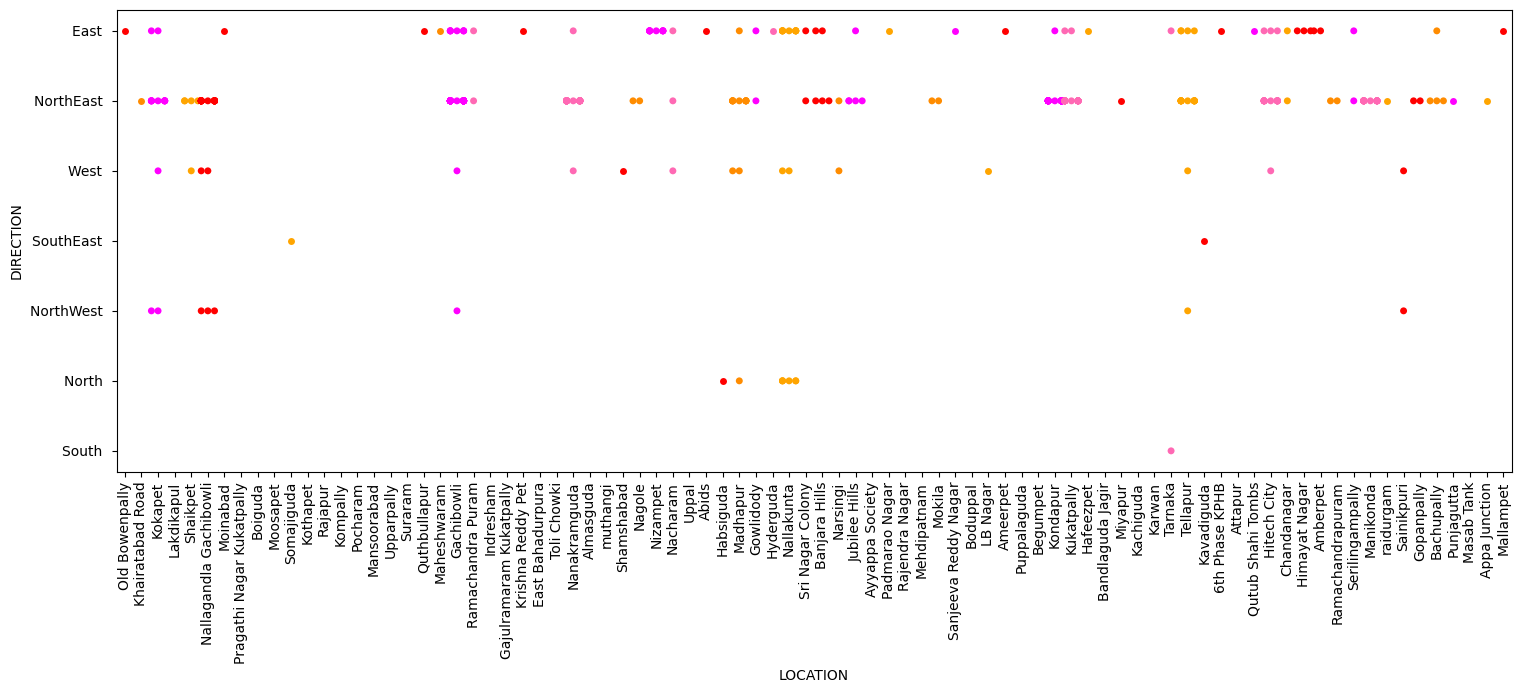

In [58]:
plt.figure(figsize =(18,6))
sns.swarmplot(x= 'LOCATION',y = 'DIRECTION',data = df,palette=["red", "darkorange", "magenta", 'hotpink', 'orange', 'red'])
plt.xticks(rotation=90)
plt.show()

<Figure size 500x500 with 0 Axes>

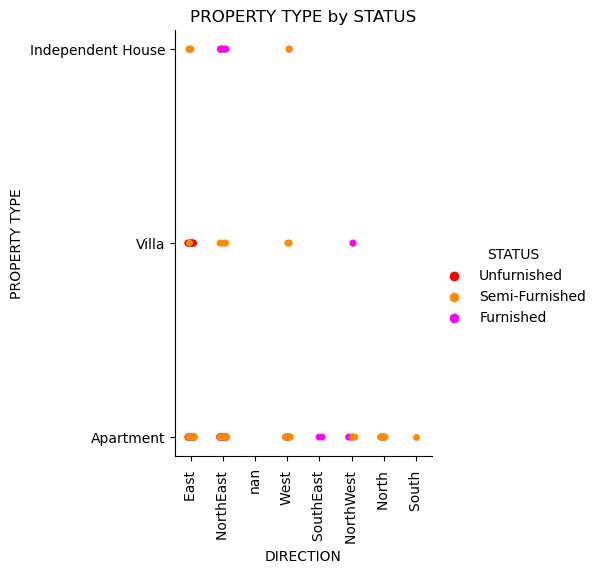

In [59]:
plt.figure(figsize=(5,5))
sns.catplot(data=df, x='DIRECTION', y='PROPERTY TYPE', hue='STATUS', palette=["red", "darkorange", "magenta"])
plt.xlabel('DIRECTION')
plt.ylabel('PROPERTY TYPE')
plt.title( 'PROPERTY TYPE by STATUS')
plt.xticks(rotation=90)
plt.show()